In [3]:
import rfpimp
import pandas as pd 
from datetime import datetime
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

## Data Cleaning

In [4]:
df = pd.read_csv("sp3.csv")

In [5]:
df.head()

,index,date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,weather_detail_id,date2
0,170,1967-01-15,1966,Superbowl,t,Green Bay Packers,35.0,10.0,Kansas City Chiefs,GB,-14.0,NaN,Los Angeles Memorial Coliseum,t,54.0,7.0,90.0,NaN,NaN,01-15-1967
1,350,1968-01-14,1967,Superbowl,t,Green Bay Packers,33.0,14.0,Oakland Raiders,GB,-13.5,43,Orange Bowl,t,60.0,12.0,74.0,NaN,NaN,01-14-1968
2,916,1971-01-17,1970,Superbowl,t,Baltimore Colts,16.0,13.0,Dallas Cowboys,IND,-2.5,36,Orange Bowl,t,59.0,11.0,60.0,NaN,NaN,01-17-1971
3,1105,1972-01-16,1971,Superbowl,t,Dallas Cowboys,24.0,3.0,Miami Dolphins,DAL,-6.0,34,Tulane Stadium,t,34.0,18.0,40.0,NaN,NaN,01-16-1972
4,1294,1973-01-14,1972,Superbowl,t,Miami Dolphins,14.0,7.0,Washington Redskins,MIA,-1.0,33,Los Angeles Memorial Coliseum,t,64.0,7.0,53.0,NaN,NaN,01-14-1973


In [6]:
schedule_date = []
home = []
away = []
score = []
temp = []
wind = []
humidity = []

for k, row in df.iterrows():
    schedule_date.append(row['date2'])
    schedule_date.append(row['date2'])
    home.append(1)
    home.append(0)
    away.append(0)
    away.append(1)
    score.append(row['score_home'])
    score.append(row['score_away'])
    temp.append(row['weather_temperature'])
    temp.append(row['weather_temperature'])
    wind.append(row['weather_wind_mph'])
    wind.append(row['weather_wind_mph'])
    humidity.append(row['weather_humidity'])
    humidity.append(row['weather_humidity'])
    
    
team_df_data = {'home': home, 'away': away, 'schedule_date': schedule_date, 'score': score, 'temp': temp, 'wind_mph': wind, 'humidity': humidity}
    
df_new_t = pd.DataFrame(team_df_data)
df_new_t

,home,away,schedule_date,score,temp,wind_mph,humidity
0,1,0,01-15-1967,35.0,54.0,7.0,90.0
1,0,1,01-15-1967,10.0,54.0,7.0,90.0
2,1,0,01-14-1968,33.0,60.0,12.0,74.0
3,0,1,01-14-1968,14.0,60.0,12.0,74.0
4,1,0,01-17-1971,16.0,59.0,11.0,60.0
...,...,...,...,...,...,...,...
21501,0,1,01-17-2022,11.0,72.0,0.0,NaN
21502,1,0,01-30-2022,20.0,72.0,0.0,NaN
21503,0,1,01-30-2022,17.0,72.0,0.0,NaN
21504,1,0,02-13-2022,NaN,72.0,0.0,NaN


In [7]:
df_new_t['score'] = df_new_t['score'].fillna(0)


In [8]:
import math
median_humidity = math.floor(df_new_t.humidity.median())
median_humidity

68

In [9]:
df_new_t.humidity = df_new_t.humidity.fillna(median_humidity)

In [10]:
df_new_t

,home,away,schedule_date,score,temp,wind_mph,humidity
0,1,0,01-15-1967,35.0,54.0,7.0,90.0
1,0,1,01-15-1967,10.0,54.0,7.0,90.0
2,1,0,01-14-1968,33.0,60.0,12.0,74.0
3,0,1,01-14-1968,14.0,60.0,12.0,74.0
4,1,0,01-17-1971,16.0,59.0,11.0,60.0
...,...,...,...,...,...,...,...
21501,0,1,01-17-2022,11.0,72.0,0.0,68.0
21502,1,0,01-30-2022,20.0,72.0,0.0,68.0
21503,0,1,01-30-2022,17.0,72.0,0.0,68.0
21504,1,0,02-13-2022,0.0,72.0,0.0,68.0


In [11]:
df_new_t['schedule_date'] = pd.to_datetime(df_new_t['schedule_date'])
df_new_t

,home,away,schedule_date,score,temp,wind_mph,humidity
0,1,0,1967-01-15,35.0,54.0,7.0,90.0
1,0,1,1967-01-15,10.0,54.0,7.0,90.0
2,1,0,1968-01-14,33.0,60.0,12.0,74.0
3,0,1,1968-01-14,14.0,60.0,12.0,74.0
4,1,0,1971-01-17,16.0,59.0,11.0,60.0
...,...,...,...,...,...,...,...
21501,0,1,2022-01-17,11.0,72.0,0.0,68.0
21502,1,0,2022-01-30,20.0,72.0,0.0,68.0
21503,0,1,2022-01-30,17.0,72.0,0.0,68.0
21504,1,0,2022-02-13,0.0,72.0,0.0,68.0


In [12]:
df_new_t['schedule_date'] = df_new_t['schedule_date'].dt.year

In [13]:
df = df_new_t.fillna(0)
df_home = df.loc[df['home']==1]
df_away = df.loc[df['away']==1]
df_away

,home,away,schedule_date,score,temp,wind_mph,humidity
1,0,1,1967,10.0,54.0,7.0,90.0
3,0,1,1968,14.0,60.0,12.0,74.0
5,0,1,1971,13.0,59.0,11.0,60.0
7,0,1,1972,3.0,34.0,18.0,40.0
9,0,1,1973,7.0,64.0,7.0,53.0
...,...,...,...,...,...,...,...
21497,0,1,2022,17.0,72.0,0.0,68.0
21499,0,1,2022,23.0,72.0,0.0,68.0
21501,0,1,2022,11.0,72.0,0.0,68.0
21503,0,1,2022,17.0,72.0,0.0,68.0


## Feature Ranking Home

In [14]:
features = ['away','home','schedule_date', 'score','temp','wind_mph','humidity']

In [15]:
df_train, df_test = train_test_split(df_home, test_size=0.20)
df_train = df_train[features]
df_test = df_test[features]

X_train, y_train = df_train.drop('score',axis=1), df_train['score']
X_test, y_test = df_test.drop('score',axis=1), df_test['score']

In [16]:
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [17]:
imp = rfpimp.importances(rf, X_test, y_test)

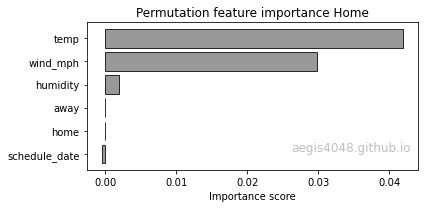

In [18]:
fig, ax = plt.subplots(figsize=(6, 3))

ax.barh(imp.index, imp['Importance'], height=0.8, facecolor='grey', alpha=0.8, edgecolor='k')
ax.set_xlabel('Importance score')
ax.set_title('Permutation feature importance Home')
ax.text(0.8, 0.15, 'aegis4048.github.io', fontsize=12, ha='center', va='center',
        transform=ax.transAxes, color='grey', alpha=0.5)
plt.gca().invert_yaxis()

fig.tight_layout()

## 3d Vis AWAY

In [23]:
X = df_away[['temp', 'wind_mph']].values.reshape(-1,2)
Y = df_away['score']

In [24]:
x = X[:, 0]
y = X[:, 1]
z = Y

x_pred = np.linspace(0, 50,30)   
y_pred = np.linspace(0, 50, 30)
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

In [25]:
from sklearn import linear_model
ols = linear_model.LinearRegression()
model = ols.fit(X, Y)
predicted = model.predict(model_viz)

In [26]:
r2 = model.score(X, Y)

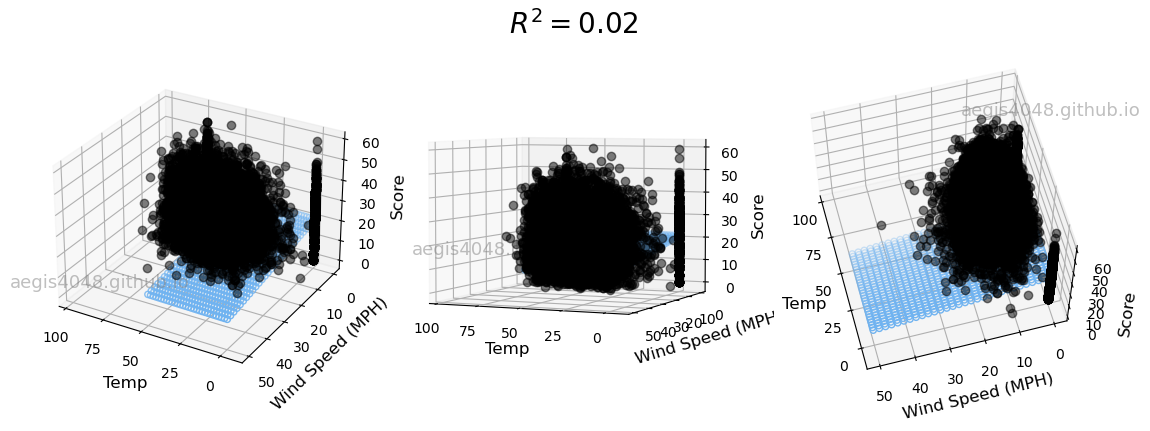

In [27]:
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T
plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('Temp', fontsize=12)
    ax.set_ylabel('Wind Speed (MPH)', fontsize=12)
    ax.set_zlabel('Score', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.text2D(0.2, 0.32, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax1.transAxes, color='grey', alpha=0.5)
ax2.text2D(0.3, 0.42, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax2.transAxes, color='grey', alpha=0.5)
ax3.text2D(0.85, 0.85, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax3.transAxes, color='grey', alpha=0.5)

ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()

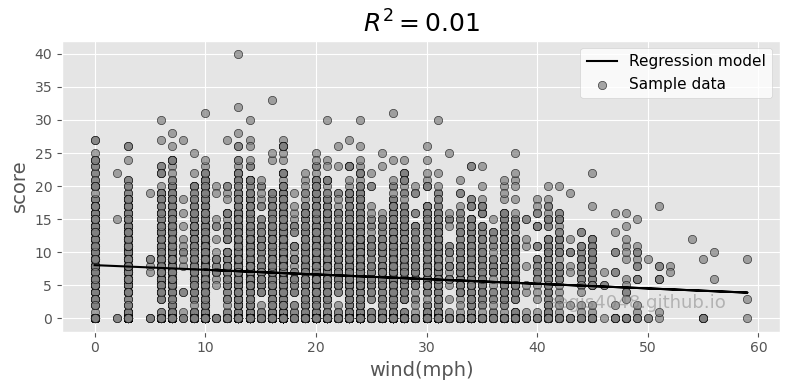

In [28]:
X_reg = df_away['score'].values.reshape(-1,1)
y_reg = df_away['wind_mph'].values


ols = linear_model.LinearRegression()
model = ols.fit(X_reg, y_reg)
response = model.predict(X_reg)

r2 = model.score(X_reg, y_reg)

plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(X_reg, response, color='k', label='Regression model')
ax.scatter(X_reg, y_reg, edgecolor='k', facecolor='grey', alpha=0.7, label='Sample data')
ax.set_ylabel('score', fontsize=14)
ax.set_xlabel('wind(mph)', fontsize=14)
ax.text(0.8, 0.1, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
         transform=ax.transAxes, color='grey', alpha=0.5)
ax.legend(facecolor='white', fontsize=11)
ax.set_title('$R^2= %.2f$' % r2, fontsize=18)

fig.tight_layout()

# Summary for feature ranking

In [20]:
import statsmodels.api as sm
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     15.34
Date:                Wed, 25 May 2022   Prob (F-statistic):           1.66e-12
Time:                        18:36:54   Log-Likelihood:                -32338.
No. Observations:                8602   AIC:                         6.469e+04
Df Residuals:                    8597   BIC:                         6.472e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
away                   0          0        nan

/Users/ikehannah/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


# summary for 2d Regression

In [30]:
X_reg2 = sm.add_constant(X_reg)
est2 = sm.OLS(y_reg, X_reg2)
est3 = est2.fit()
print(est3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     160.5
Date:                Tue, 24 May 2022   Prob (F-statistic):           1.58e-36
Time:                        02:27:45   Log-Likelihood:                -34174.
No. Observations:               10753   AIC:                         6.835e+04
Df Residuals:                   10751   BIC:                         6.837e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.0608      0.125     64.657      0.0